In [1]:
import numpy as np
import sympy as sp
import torch
import matplotlib.pyplot as plt

## Let's start with a function, as described in Baydin et. al. 2018, Figure 2

In [2]:
def f(x): 
    v=x
    for i in (1,2,3):
        v = 4*v*(1-v)
    return v

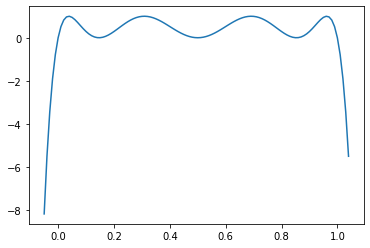

In [3]:
x=np.arange(-.05,1.05,.01) # values between -0.05 and 1.05
y=np.array([f(val) for val in x]) # the corresponding f(x) 
plt.plot(x,y)
plt.show()

## What are the derivatives?

Manual differentiation produces the following.

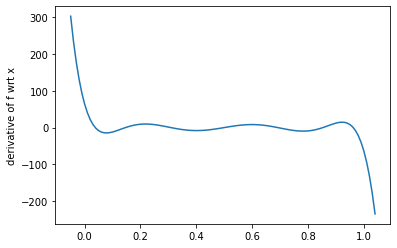

In [4]:
dfdx = (
    128*x*(1-x)*(-8 + 16*x)*(1-2*x)**2*(1-8*x+8*x**2)
    + 64*(1-x)*(1-2*x)**2*(1-8*x+8*x**2)**2 
    - 64*x*(1 - 2*x)**2*(1 - 8*x + 8*x**2)**2 
    - 256*x*(1 - x)*(1 - 2*x)*(1 - 8*x + 8*x**2)**2
)
plt.plot(x,dfdx)
plt.ylabel('derivative of f wrt x')
plt.show()

## Computer derivatives without manual differentiation

## Numerical differentiation

In [5]:
def numdiff(x,h):
    return (f(x+h) - f(x))/h

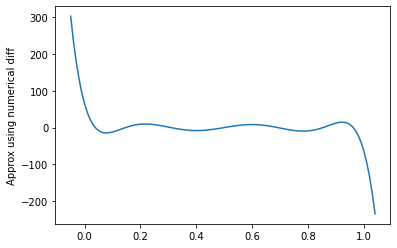

In [6]:
h=0.00000001
dfdx_1=np.array([numdiff(val,h) for val in x])

plt.plot(x,dfdx_1)
plt.ylabel('Approx using numerical diff')
plt.show()

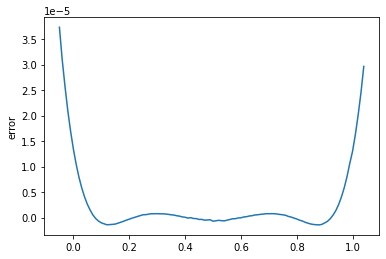

In [7]:
plt.plot(x, (dfdx-dfdx_1))
plt.ylabel('error')
plt.show()

## Symbolic differentiation

In [8]:
x2 = sp.symbols('x2')
dfdx_2_expr = sp.diff(
            64*x2 * (1-x2)*(1-2*x2)**2 * (1-8*x2+8*x2**2)**2, 
            x2
            )
dfdx_2_expr

64*x2*(1 - 2*x2)**2*(1 - x2)*(32*x2 - 16)*(8*x2**2 - 8*x2 + 1) - 64*x2*(1 - 2*x2)**2*(8*x2**2 - 8*x2 + 1)**2 + 64*x2*(1 - x2)*(8*x2 - 4)*(8*x2**2 - 8*x2 + 1)**2 + 64*(1 - 2*x2)**2*(1 - x2)*(8*x2**2 - 8*x2 + 1)**2

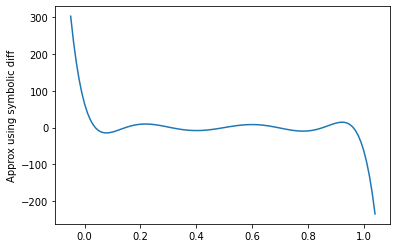

In [9]:
dfdx_2 = [dfdx_2_expr.subs(x2, val) for val in x]
plt.plot(x,dfdx_2)
plt.ylabel('Approx using symbolic diff')
plt.show()

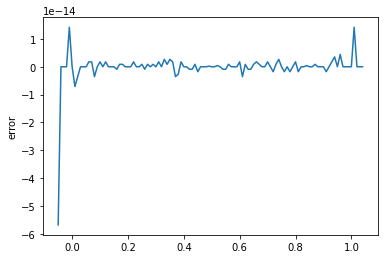

In [10]:
plt.plot(x, (dfdx-dfdx_2))
plt.ylabel('error')
plt.show()

## Automatic differentiation (Forward)

In [11]:
def ff(x): 
    v=x
    dv=1
    for i in (1,2,3):
        dv = 4*dv - 8*v*dv
        v = 4*v*(1-v)
    return dv

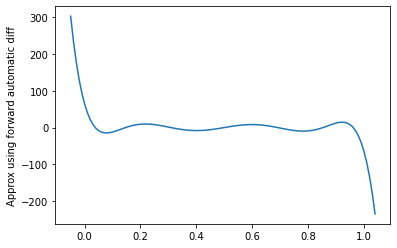

In [12]:
dfdx_3 = np.array([ff(val) for val in x])
plt.plot(x,dfdx_3)
plt.ylabel('Approx using forward automatic diff')
plt.show()

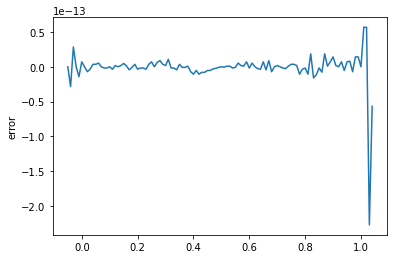

In [13]:
plt.plot(x, (dfdx-dfdx_3))
plt.ylabel('error')
plt.show()

## Automatic diff, Backward (Backprop)

In [14]:
def fb(x):
    xt = torch.tensor([float(x)], requires_grad=True, dtype=torch.double)
    v=xt
    for i in (1,2,3):
        v = 4*v*(1 - v)
    v.backward()
    return xt.grad[0]

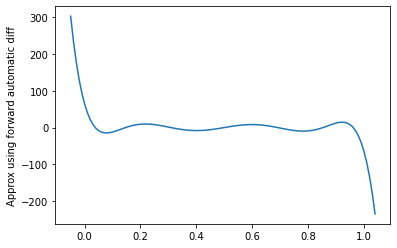

In [15]:
dfdx_4 = np.array([fb(val) for val in x])
plt.plot(x,dfdx_4)
plt.ylabel('Approx using forward automatic diff')
plt.show()

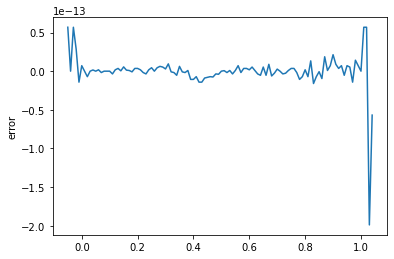

In [16]:
plt.plot(x, (dfdx-dfdx_4))
plt.ylabel('error')
plt.show()